In [280]:
import numpy as np
import seaborn as sns

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

In [281]:
path = "/home/marco/Documents/PhD/PhysiBoSS/sample_projects_intracellular/boolean/cell_cycle/config/boolean_network/"

In [282]:
bnd_file = path + "sizek.bnd"
cfg_file = path + "sizek_sustained.cfg"

masim = maboss.load(bnd_file, cfg_file)

/home/marco/anaconda3/envs/MaBoSS_env/lib/python3.9/site-packages/maboss/figures.py:86: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(plot_line, labels=plotting_labels, radius=1.2,


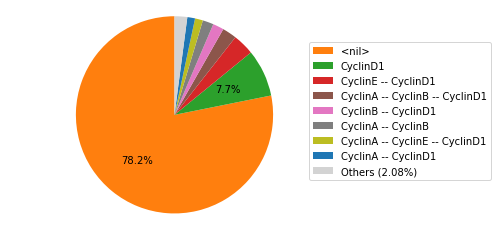

In [283]:
#Wild type

sim = masim.copy()

outputs = [ "Cdh1", "Cdc20"]

cyclins = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]

sim.network.set_output(cyclins)

model = sim.run()

model.plot_piechart()

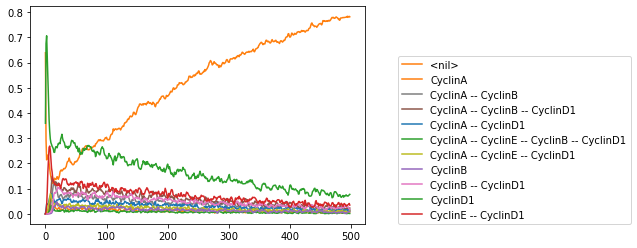

In [284]:
model.plot_trajectory()

In [285]:
## Discrete time
WT_phenotypes_discrete = sim.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=1, max_time=150)

In [286]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 1.9 ms, sys: 4.67 ms, total: 6.57 ms
Wall time: 243 ms


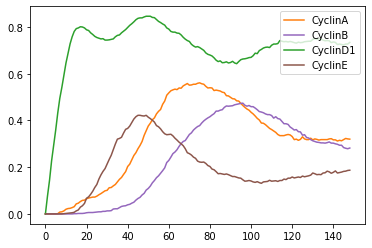

In [287]:
res_discrete.plot_node_trajectory()

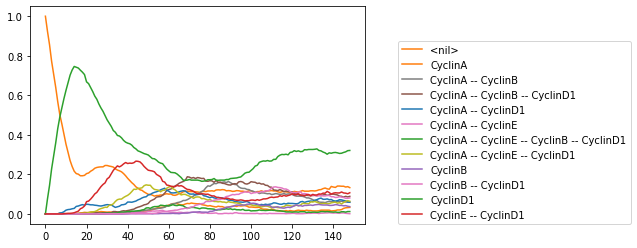

In [288]:
res_discrete.plot_trajectory()

In [289]:
bnd_file = path + "sizek_phenotypes.bnd"
cfg_file = path + "sizek_sustained_phenotypes.cfg"

sim_phenotypes = maboss.load(bnd_file, cfg_file)

In [290]:
WT_phenotypes = sim_phenotypes.copy()

WT_result = WT_phenotypes.run()

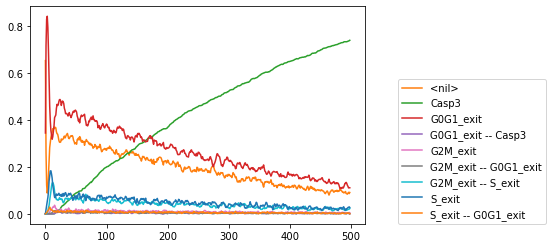

In [291]:
WT_result.plot_trajectory()

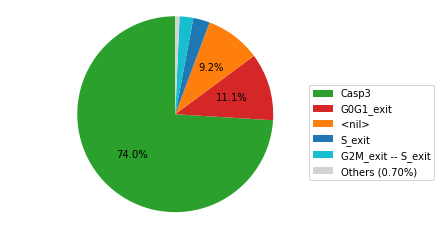

In [292]:
WT_result.plot_piechart()

CPU times: user 3.76 ms, sys: 3.96 ms, total: 7.72 ms
Wall time: 3.42 s


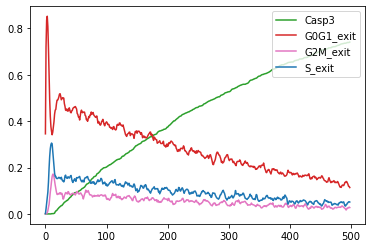

In [293]:
%time res = WT_phenotypes.run()
res.plot_node_trajectory()

In [294]:
## Discrete time
WT_phenotypes_discrete = WT_phenotypes.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=1, max_time=100)

WT_phenotypes_discrete.network.set_output(cyclins)

In [295]:
%time res_discrete = WT_phenotypes_discrete.run()

CPU times: user 3.1 ms, sys: 5.06 ms, total: 8.16 ms
Wall time: 182 ms


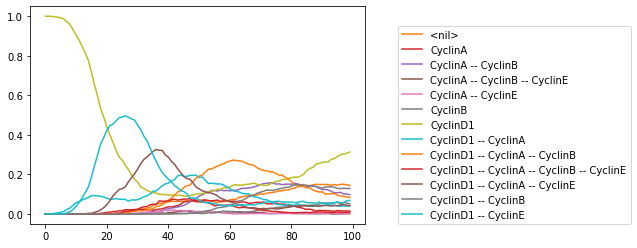

In [296]:
res_discrete.plot_trajectory()

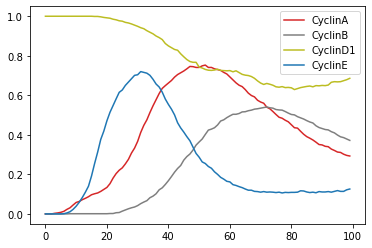

In [297]:
res_discrete.plot_node_trajectory()

CPU times: user 0 ns, sys: 7.96 ms, total: 7.96 ms
Wall time: 188 ms


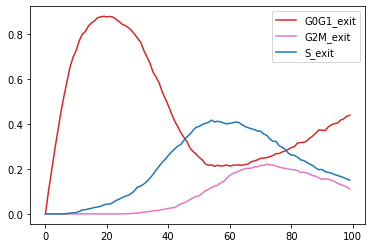

In [298]:
outputs_phenotype = ["G0G1_exit", "G2M_exit", "S_exit"]
WT_phenotypes_discrete.network.set_output(outputs_phenotype)

%time res_discrete = WT_phenotypes_discrete.run()
res_discrete.plot_node_trajectory()

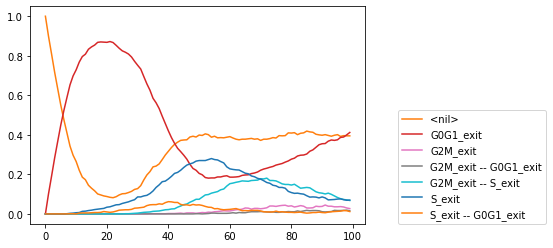

In [299]:
res_discrete.plot_trajectory()

In [300]:
WT_phenotypes_trajs = WT_phenotypes.copy()
WT_phenotypes_trajs.update_parameters(display_traj=1, thread_count=1)

In [301]:
%time res_trajs = WT_phenotypes_trajs.run()

CPU times: user 3.43 ms, sys: 48.4 ms, total: 51.9 ms
Wall time: 25.7 s


In [302]:
outputs = ["CyclinA", "CyclinB", "CyclinE", "CyclinD1"]
outputs_phenotype = ["G0G1_exit", "G2M_exit", "S_exit"]
trajs, all_states = load_trajs(res_trajs._path, outputs_phenotype, )
stg_counts, state_ids, ids_state = compute_stg_counts(trajs, all_states)

In [303]:
data = pd.DataFrame(
    data=stg_counts,
    index=state_ids.keys(), columns=state_ids.keys()
)
data

,<nil>,G0G1_exit,G0G1_exit -- G2M_exit,G0G1_exit -- S_exit,G2M_exit,G2M_exit -- S_exit,S_exit
<nil>,0.0,14058.0,0.0,0.0,0.0,0.0,9299.0
G0G1_exit,13836.0,0.0,0.0,3412.0,0.0,0.0,0.0
G0G1_exit -- G2M_exit,0.0,1909.0,0.0,0.0,59.0,0.0,0.0
G0G1_exit -- S_exit,0.0,1388.0,0.0,0.0,0.0,0.0,3311.0
G2M_exit,4729.0,0.0,1968.0,0.0,0.0,79.0,0.0
G2M_exit -- S_exit,0.0,0.0,0.0,0.0,6725.0,0.0,685.0
S_exit,4630.0,0.0,0.0,1290.0,0.0,7354.0,0.0


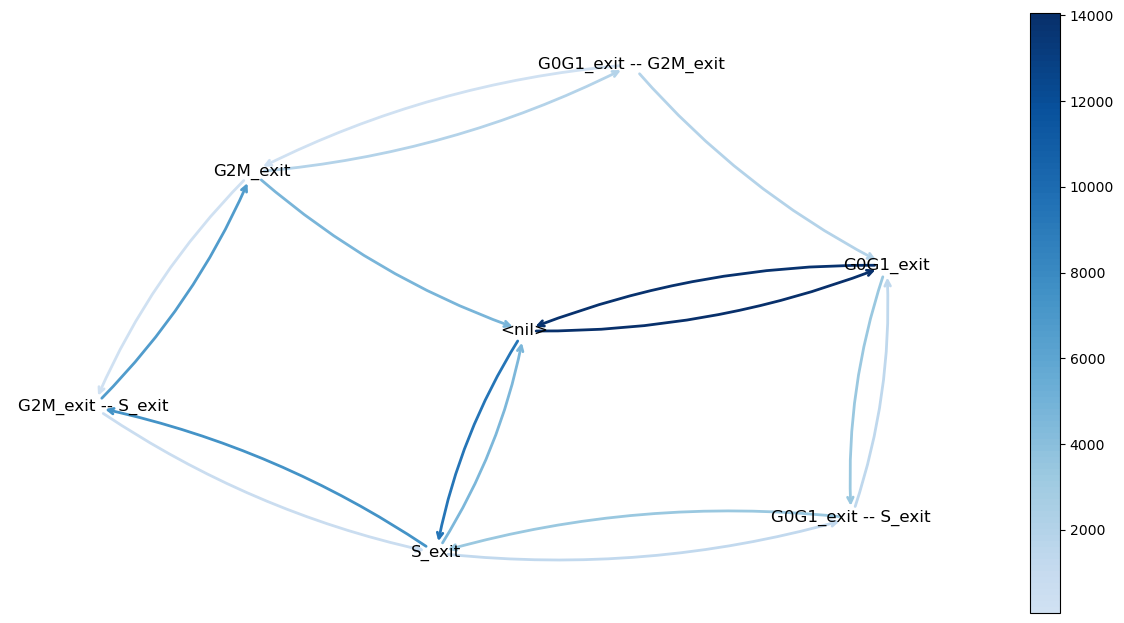

In [304]:
draw_graph_from_pandas(data)

In [305]:
probas = pd.DataFrame(
    data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]), 
    index=state_ids.keys(), columns=state_ids.keys()
)
probas

,<nil>,G0G1_exit,G0G1_exit -- G2M_exit,G0G1_exit -- S_exit,G2M_exit,G2M_exit -- S_exit,S_exit
<nil>,0.000000,0.601875,0.000000,0.000000,0.000000,0.000000,0.398125
G0G1_exit,0.802180,0.000000,0.000000,0.197820,0.000000,0.000000,0.000000
G0G1_exit -- G2M_exit,0.000000,0.970020,0.000000,0.000000,0.029980,0.000000,0.000000
G0G1_exit -- S_exit,0.000000,0.295382,0.000000,0.000000,0.000000,0.000000,0.704618
G2M_exit,0.697904,0.000000,0.290437,0.000000,0.000000,0.011659,0.000000
G2M_exit -- S_exit,0.000000,0.000000,0.000000,0.000000,0.907557,0.000000,0.092443
S_exit,0.348802,0.000000,0.000000,0.097182,0.000000,0.554015,0.000000


In [306]:
%time paths_dict = compute_circuits(probas, ids_state, '<nil>', 0)

CPU times: user 5.75 ms, sys: 1.86 ms, total: 7.61 ms
Wall time: 2.54 ms


In [307]:
for proba in sorted(paths_dict, reverse=True):
    #if proba > 0.01:
    print("%.2f : %s" % (proba, paths_dict[proba]))

0.48 : ['<nil>', 'G0G1_exit']
0.14 : ['<nil>', 'S_exit', 'G2M_exit -- S_exit', 'G2M_exit']
0.14 : ['<nil>', 'S_exit']
0.05 : ['<nil>', 'S_exit', 'G2M_exit -- S_exit', 'G2M_exit', 'G0G1_exit -- G2M_exit', 'G0G1_exit']
0.03 : ['<nil>', 'G0G1_exit', 'G0G1_exit -- S_exit', 'S_exit', 'G2M_exit -- S_exit', 'G2M_exit']
0.03 : ['<nil>', 'G0G1_exit', 'G0G1_exit -- S_exit', 'S_exit']
0.01 : ['<nil>', 'S_exit', 'G0G1_exit -- S_exit', 'G0G1_exit']
